In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import cv2

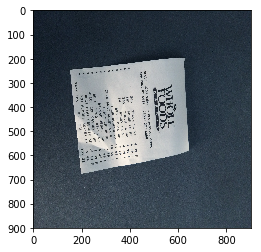

In [95]:
image_path = 'receipt.jpg'
img = cv2.imread(image_path)
img = cv2.resize(img,(900,900))
plt.imshow(img)
plt.show()

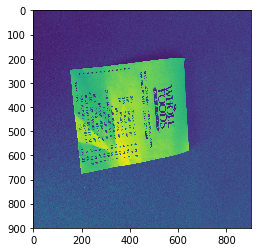

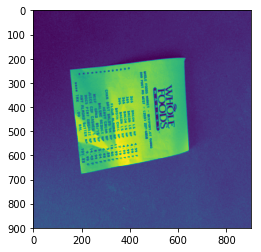

In [96]:
##Image Blurring

original = img.copy()
gray = cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
blurred = cv2.GaussianBlur(gray,(9,9),0)
plt.imshow(blurred)
plt.show()

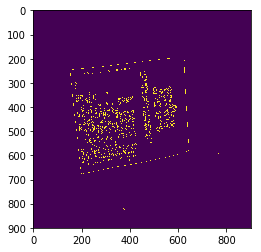

In [97]:
##Edge Detection
edged = cv2.Canny(blurred,0,50)
orig_edged = edged.copy()
plt.imshow(orig_edged)
plt.show()

In [98]:
#contours Extraction

_,contours,_ = cv2.findContours(edged,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
print(len(contours))
contours = sorted(contours,reverse=True,key = cv2.contourArea)

678


In [99]:
##Best Contour Selection
for contour in contours:
    p = cv2.arcLength(contour,True)
    approx = cv2.approxPolyDP(contour,0.02*p,True)
    if(len(approx)==4):
        target = approx
        break
print target.shape

(4, 1, 2)


In [100]:
print target

[[[628 198]]

 [[153 247]]

 [[200 676]]

 [[642 580]]]


In [111]:
def reorder(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2), dtype=np.float32)
    add = h.sum(axis=1)
    diff = np.diff(h,axis=1)
    hnew[3] = h[np.argmin(add)]
    hnew[1] = h[np.argmax(add)]
    hnew[0] = h[np.argmin(diff)]
    hnew[2] = h[np.argmax(diff)]
    return hnew

In [112]:
reordered = reorder(target)
input_rep = reordered

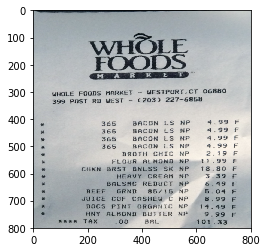

In [113]:
output_map = np.float32([[0,0],[800,0],[800,800],[0,800]])
M = cv2.getPerspectiveTransform(input_rep, output_map)
ans = cv2.warpPerspective(original, M, (800,800))
plt.imshow(ans)
plt.show()

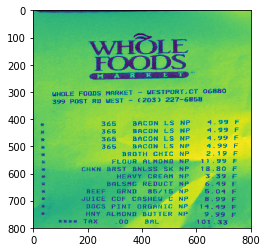

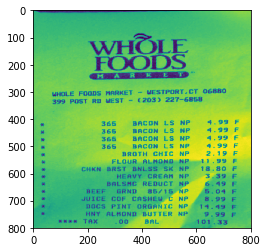

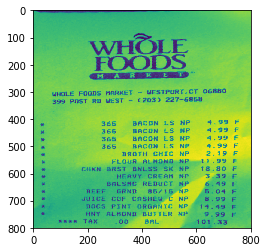

In [114]:
ans2 = cv2.cvtColor(ans, cv2.COLOR_BGR2GRAY)
temp = cv2.GaussianBlur(ans2, (3,3), 0)
temp2 = cv2.GaussianBlur(ans2, (5,5), 0)
temp3 = cv2.GaussianBlur(ans2, (1,1), 0)
plt.imshow(temp)
plt.show()

plt.imshow(temp2)
plt.show()

plt.imshow(temp3)
plt.show()

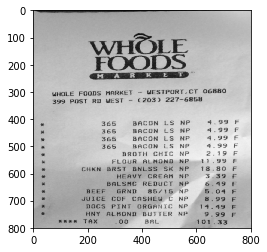

In [115]:
now = cv2.cvtColor(temp, cv2.COLOR_GRAY2BGR)
plt.imshow(now)
plt.show()